# Эффект Поккельса

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import dataframe_image as dfi
from scipy.stats import linregress

### Интерференция

График зависиомти радиуса кольца от номера 

In [18]:
def plotRbyM(L: float,r: np.ndarray,r_err = 0.5):
    m = np.arange(1,r.shape[0]+1,1)
    r_error = np.array([r_err]*r.shape[0])

    MNK = linregress(x = m,y = r)
    xLine = np.linspace(0,r.shape[0]+1,100)
    yLine = MNK.slope*xLine + MNK.intercept
    yLineErrorUp = (MNK.slope+MNK.stderr)*xLine + MNK.intercept + MNK.intercept_stderr
    yLineErrorDown = (MNK.slope-MNK.stderr)*xLine + MNK.intercept - MNK.intercept_stderr

    fig,ax = plt.subplots(figsize = (16,8))

    plt.errorbar(x = m,y = r,yerr = r_error,fmt = '_',label = "Экспериментальные данные")
    plt.plot(xLine,
            yLine,
            label = r"МНК $\alpha = "+ str(round(MNK.slope,2)) + r"\pm" + str(round(MNK.stderr,2)) + "$")
    plt.plot(xLine,yLineErrorDown,color = 'red',ls = '-.')
    plt.plot(xLine,yLineErrorUp,color = 'red',ls = '-.')

    plt.yticks(np.arange(0,np.floor(max(r))+1,.25))
    plt.xlim((0,m[-1]+0.5))
    plt.ylim((0,r_err+max(r)+.25))
    plt.xticks(np.arange(0,r.shape[0]+1,1))
    plt.grid()
    plt.legend(loc = 'upper left')
    plt.title(r"Зависимость $r(m)$, $L = "+str(L)+ r"\ см $")
    plt.xlabel(r"Номер кольца $m$")
    plt.ylabel(r"Квадрат радиуса кольца $r$ $[см^{2}]$")
    plt.show()

    return MNK

Вычисление двулучепреломления кристалла

$$
cff = n_{0} - n_{e} = \frac{\lambda}{l} \frac{(n_{0}L)^{2}}{r_{m}^{2}} m = \frac{1}{\alpha} \frac{\lambda (n_{0}L)^{2}}{l}
$$

Константы:
- $n_{0} = 0.29$
- $\lambda = 0.63 \ мкм$
- $l = 26 \ мм$

In [26]:
def countCff(L: float,r: np.ndarray,MNK):
    n0,lamda,l = 0.29,0.63*np.power(0.1,6)*np.power(10,2),26*np.power(0.1,1)
    cff = MNK.slope*lamda*((n0*L)**2)/(l)
    print(cff)


![alt text](41_draw.png)

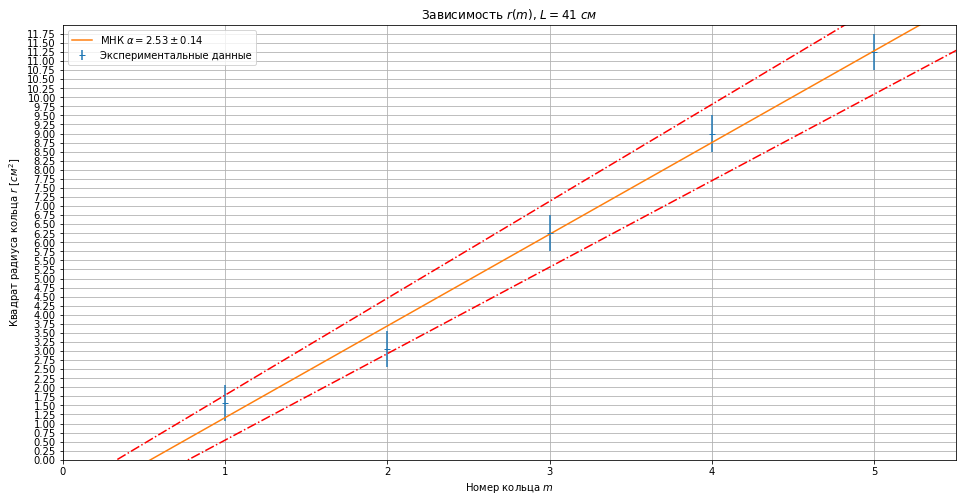

0.008668414439354245


In [27]:
L = 41 #см
r = np.power(np.array([1.25,1.75,2.5,3,3+0.5*np.sqrt(2)/2]),2) #cm^2
m = np.arange(1,r.shape[0]+1,1)

MNK = plotRbyM(L,r)
countCff(L,r,MNK)
